In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

from pathlib import Path
from tqdm import tqdm
import cv2
import os

from slicing import *


In [2]:
base_path = Path(os.path.abspath(os.path.join("data", "INbreast Release 1.0")))
csvs_path = base_path
png_folder = base_path/'AllPNGs'
masks_folder = base_path/'AllMasks'
dcm_folder = base_path/'AllDICOMs'
xml_folder = base_path/'AllXML'


In [3]:
image_filanme = "20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
image_metadata = {'img_id': image_filanme.split('_')[0],
                  'case_id': image_filanme.split('_')[1],
                  'side': image_filanme.split('_')[3],
                  'view': image_filanme.split('_')[4]}
dcm_filename = dcm_folder/image_filanme

roi_df = pd.read_csv(csvs_path/"rois_metadata.csv",
                     index_col=0)

# Usage of slicing

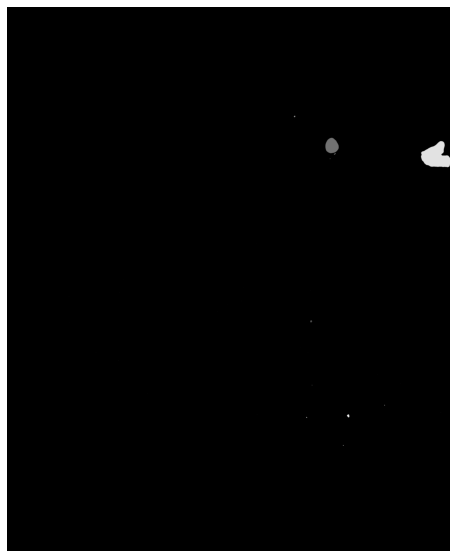

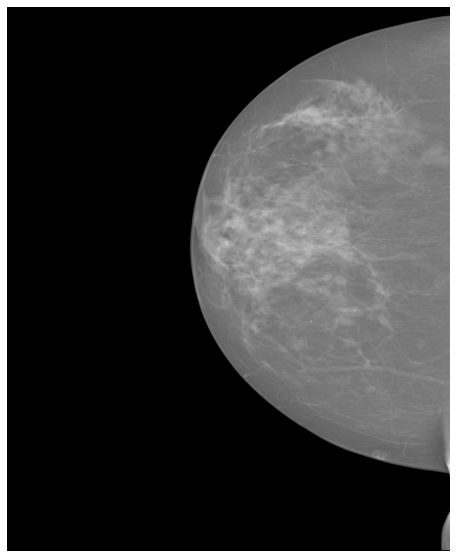

In [27]:
def simple_im_show(img, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def simple_im_show2(img, mask, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(mask, cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()

mask = cv2.imread(str(
    masks_folder/f'{image_metadata["img_id"]}_lesion_mask.png'), cv2.IMREAD_GRAYSCALE)
png = cv2.imread(
    str(png_folder/f'{image_metadata["img_id"]}.png'), cv2.IMREAD_ANYDEPTH)

simple_im_show(mask)
simple_im_show(png)



This would be the general way to extract ROIs

In [5]:
w = 256
s = 256

image_slices, mask_slices, slices_description = extract_ROIs(png, mask, roi_df, w, s, image_metadata['case_id'], int(image_metadata['img_id']))


The idea would be to develope quick filtration functions to select interesting for us ROIs. Examples below

In [25]:
def select_mC_ROIs(image_pathces, mask_patches, patched_df, min_breast_perc=0.5):
    return image_pathces[(patched_df.BreastProportion > min_breast_perc) & (patched_df.Calcification > 0)],\
    mask_patches[(patched_df.BreastProportion > min_breast_perc)
                 & (patched_df.Calcification > 0)]

def select_normal_ROIs(image_pathces, mask_patches, patched_df, min_breast_perc=0.5):
    return image_pathces[(patched_df.BreastProportion > min_breast_perc)
                 & (patched_df.NoAnomalies == 1)],\
    mask_patches[(patched_df.BreastProportion > min_breast_perc)
                 & (patched_df.NoAnomalies == 1)]


In [32]:
slices_description[(slices_description.BreastProportion > 0.5)
                 & (slices_description.Calcification > 0)]

,43,Calcification,Mass,NoAnomalies,BreastProportion
47,0.0,0.001389,0.000000,0.998611,1.000000
48,0.0,0.038712,0.000000,0.961288,1.000000
51,0.0,0.009613,0.000000,0.990387,1.000000
61,0.0,0.097092,0.000000,0.902908,1.000000
64,0.0,0.420303,0.000000,0.579697,1.000000
85,0.0,0.000015,0.000000,0.999985,1.000000
110,0.0,0.000061,0.000000,0.999939,1.000000
112,0.0,0.000015,0.000000,0.999985,1.000000
116,0.0,0.000015,0.000000,0.999985,1.000000
123,0.0,0.000015,0.000000,0.999985,0.954041


0


<Figure size 720x720 with 0 Axes>

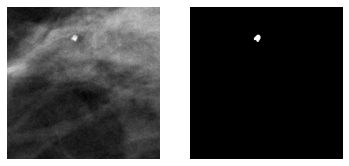

1


<Figure size 720x720 with 0 Axes>

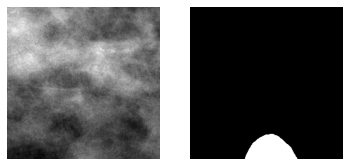

2


<Figure size 720x720 with 0 Axes>

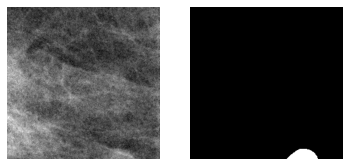

3


<Figure size 720x720 with 0 Axes>

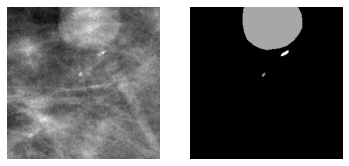

4


<Figure size 720x720 with 0 Axes>

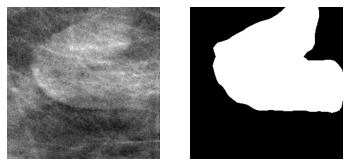

5


<Figure size 720x720 with 0 Axes>

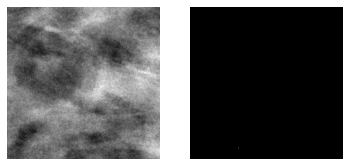

6


<Figure size 720x720 with 0 Axes>

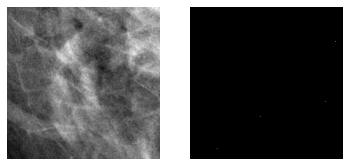

7


<Figure size 720x720 with 0 Axes>

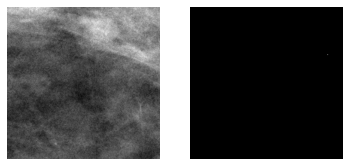

8


<Figure size 720x720 with 0 Axes>

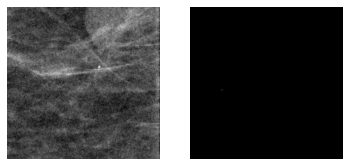

9


<Figure size 720x720 with 0 Axes>

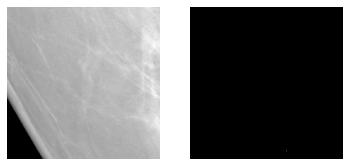

In [33]:
for ch in range(10):
    mC_img, mC_mask  = select_mC_ROIs(image_slices, mask_slices, slices_description)
    print(ch, )
    simple_im_show2(mC_img[ch], mC_mask[ch])


# ch = 0
# norm_img, norm_mask = select_normal_ROIs(image_slices, mask_slices, slices_description)
# simple_im_show2(norm_img[ch], norm_mask[ch])